In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")

In [2]:
mall_data = pd.read_csv('Mall_Customers.csv')

In [3]:
mall_data.shape

(200, 5)

In [4]:
mall_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall_data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
mall_data.dtypes.value_counts()

int64     4
object    1
Name: count, dtype: int64

In [8]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
mall_data.columns=mall_data.columns.str.replace(" ","")
mall_data.columns

Index(['CustomerID', 'Genre', 'Age', 'AnnualIncome(k$)',
       'SpendingScore(1-100)'],
      dtype='object')

In [10]:
mall_data.columns=mall_data.rename(columns={'AnnualIncome(k$)':'AnnualIncome', 'SpendingScore(1-100)':'SpendingScore',"Genre":"Gender"}).columns
mall_data.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [11]:
int_columns = mall_data.select_dtypes(include="int64").columns.tolist()
int_columns

['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']

In [12]:
cat_columns = mall_data.select_dtypes(include="O").columns.tolist()
cat_columns

['Gender']

In [13]:
copy_mall_data = mall_data.copy()
mall_data.drop("CustomerID",axis=1,inplace=True)

In [14]:
mall_data.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Text(0, 0.5, 'Count')

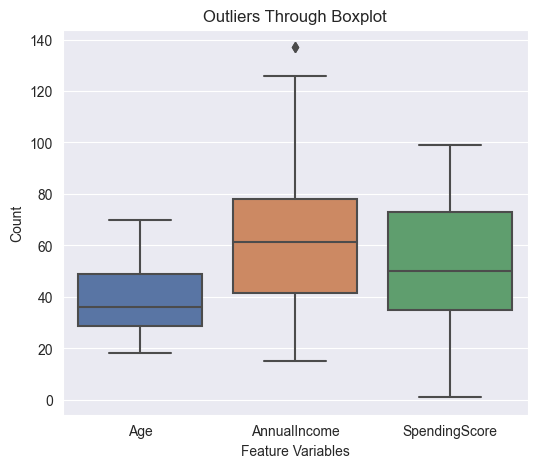

In [15]:
sb.set({"figure.figsize":(6,5)})
sb.boxplot(mall_data)
plt.title("Outliers Through Boxplot")
plt.xlabel("Feature Variables")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

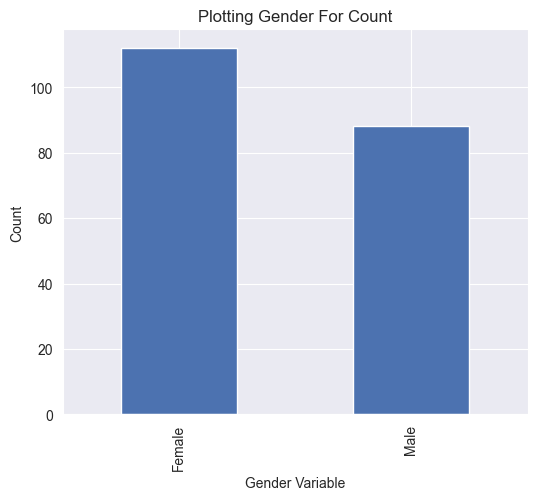

In [16]:
mall_data.Gender.value_counts().plot(kind="bar")
plt.title("Plotting Gender For Count")
plt.xlabel("Gender Variable")
plt.ylabel("Count")

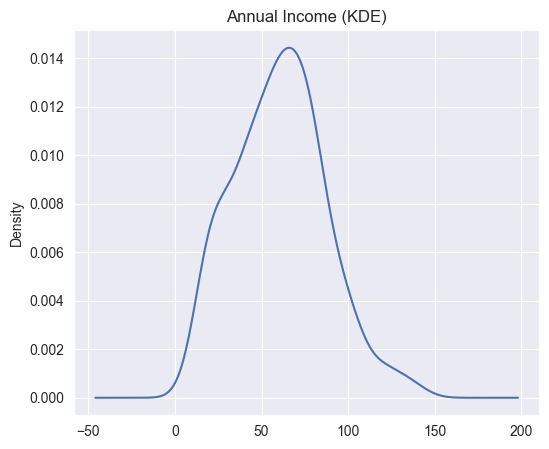

In [17]:
mall_data.AnnualIncome.plot(kind="kde")
plt.title('Annual Income (KDE)')
plt.show()

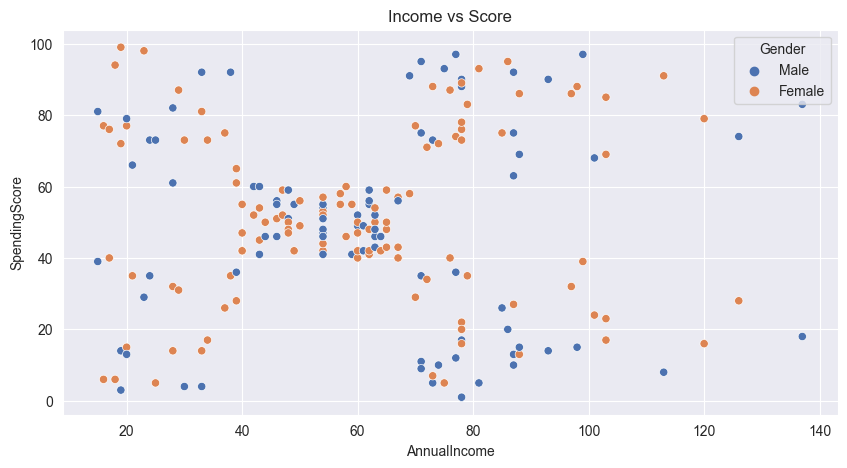

In [18]:
sb.set({"figure.figsize":(10,5)})
sb.scatterplot(data = mall_data, x='AnnualIncome', y='SpendingScore', hue="Gender")
plt.title('Income vs Score')
plt.show()

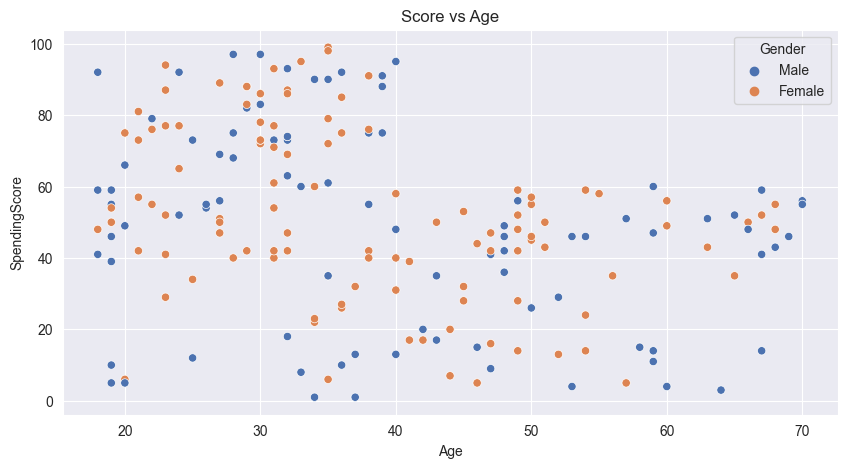

In [19]:
sb.scatterplot(data = mall_data, x='Age', y='SpendingScore', hue="Gender")
plt.title('Score vs Age')
plt.show()

In [20]:
mall_data.Gender = np.where(mall_data["Gender"]=="Male",1,0)
mall_data.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

In [21]:
mall_data.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [22]:
scaler = StandardScaler()
scaled_value = scaler.fit_transform(mall_data[["AnnualIncome","SpendingScore"]])

In [23]:
scaled_value[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [24]:
features = pd.DataFrame(scaled_value,columns=mall_data.columns[2:4].tolist())
features

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [25]:
wcss = []
for k in range(1,20):
    kmeans=KMeans(n_clusters=k,random_state=69)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
wcss[:6]

[399.99999999999994,
 269.0167937490666,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386]

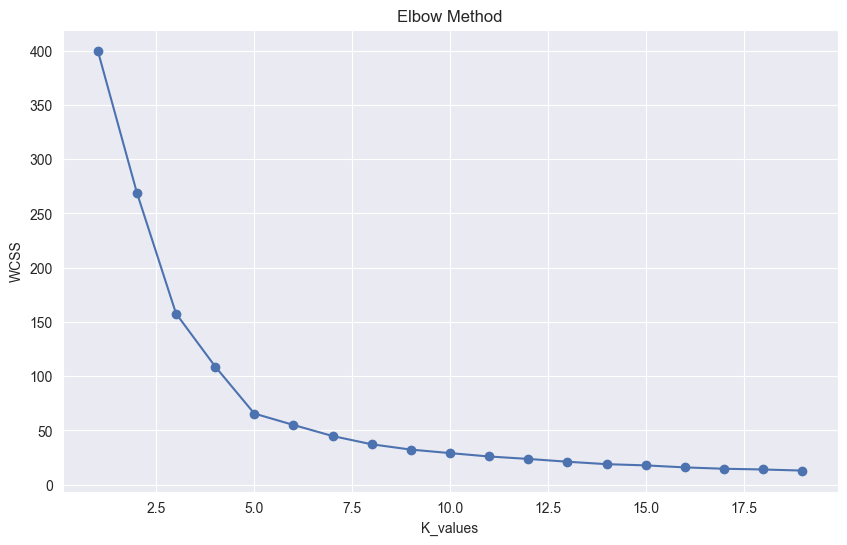

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),wcss,marker="o")
plt.xlabel('K_values')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [27]:
k_value=5

kmeans=KMeans(n_clusters=k_value,max_iter=10,random_state=69)
kmeans.fit(features)

KMeans(max_iter=10, n_clusters=5, random_state=69)

In [28]:
labels = kmeans.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [29]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

In [30]:
e = kmeans.inertia_
e

65.56840815571681

In [31]:
itr = kmeans.n_iter_
itr

5

In [32]:
new_features = features.assign(clusters=pd.DataFrame(labels))
new_features

,AnnualIncome,SpendingScore,clusters
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


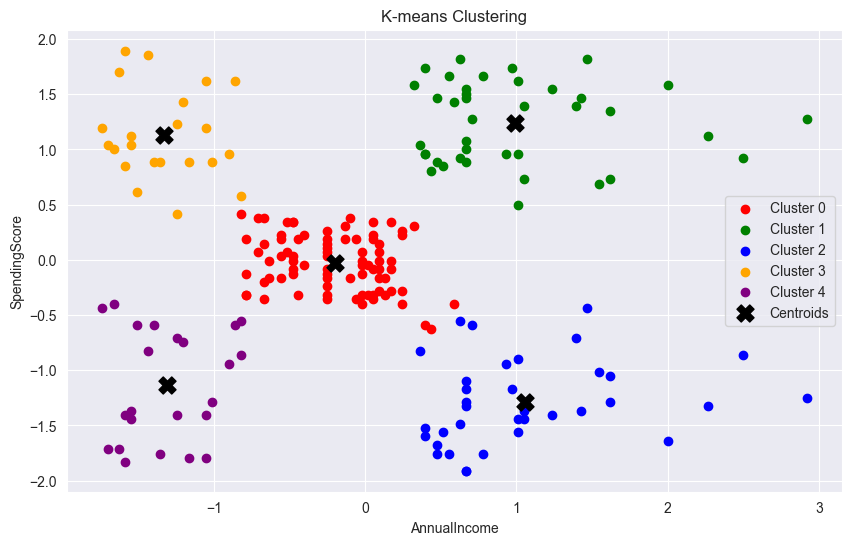

In [33]:
plt.figure(figsize=(10, 6))
color = ["red","green","blue","orange","purple"]
for cluster_num in range(k_value):
    plt.scatter(x=new_features[new_features.clusters == cluster_num]['AnnualIncome'],
               y= new_features[new_features.clusters == cluster_num]['SpendingScore'],marker='o',c=color[cluster_num],label=f'Cluster {cluster_num}')

plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c='black', marker='X', s=150, label='Centroids')

plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [34]:
score = metrics.silhouette_score(features,kmeans.labels_)
print("Silhouette_Score Coefficient : {:.2f}".format(score))

Silhouette_Score Coefficient : 0.55
